# 탐색적 데이터 분석(EDA; Exploratory Data Analysis)

데이터를 분석하고 결과를 내는 과정에 있어서 해당 데이터에 대한 `**‘탐색과 이해’**`가 반드시 필요함

  ❗️누구에게나 ‘인지편향 (cognitive bias)’ 이 있기 때문에 우리는 생각보다 ‘잘 듣고, 잘 읽는 것’ 을 ‘잘하지 못한다’.

1. raw data의 각 column과 row의 속성과 의미에 대한 이해가 필요

2. 결측치 처리 및 데이터필터링

  데이터 분석에 본격적으로 들어가기 전에 반드시 데이터에 결측치가 없는지 확인하고, 있다면 제거해줘야 한다.
  또한, 분석 시 필요한 데이터가 수치형 데이터(numerical data)인데 범주형(categorical data)으로 되어 있다면 수치형으로 변환(ex. astype 활용)해줘야 한다.

3. 누구나 이해하기 쉬운 시각화가 필요

## Understanding Data

DATASET: [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [ ]:
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/insurance.csv')

print("data head:")
print(data.head(3))
print("=====================================")
print("data shape:", data.shape)
print("=====================================")
print("columns: ", data.columns)
print("=====================================")
print("data types:")
print(data.dtypes)

data head:
   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523
2   28    male  33.00         3     no  southeast   4449.4620
data shape: (1338, 7)
columns:  Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
# data 속성 바꾸기
data.charges = data.charges.astype('int64')
print("data types:")
print(data.dtypes)
print("=====================================")

# 데이터 유형별로 그룹화
g = data.columns.to_series().groupby(data.dtypes).groups
print(g)
print("=====================================")

dt = {k.name: v for k, v in g.items()}
# 그룹화된 데이터 테이블로 보기주기
attributes_by_datatype = pd.DataFrame(list(dt.values()),
                                      index = dt.keys(),
                                      columns = ['Attr 1', 'Attr 2', 'Attr 3'])
print(attributes_by_datatype)

data types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges       int64
dtype: object
{int64: ['age', 'children', 'charges'], float64: ['bmi'], object: ['sex', 'smoker', 'region']}
        Attr 1    Attr 2   Attr 3
int64      age  children  charges
float64    bmi      None     None
object     sex    smoker   region


각 열의 데이터 유형을 확인해보면 모두 동일하지 않다.

'sex', 'smoker' 및 'region' 열의 데이터 유형은 'object'이며 이는 숫자가 아닌 문자열 값을 가짐을 의미한다.

대부분의 figure들은 숫자 속성에 대해 만들어지므로 이러한 열은 수치형 데이터로 변환하는 등의 추가적인 처리가 필요하다.

In [ ]:
print(data.describe().transpose())

           count          mean           std      min         25%     50%  \
age       1338.0     39.207025     14.049960    18.00    27.00000    39.0   
bmi       1338.0     30.663397      6.098187    15.96    26.29625    30.4   
children  1338.0      1.094918      1.205493     0.00     0.00000     1.0   
charges   1338.0  13269.928999  12110.012755  1121.00  4740.00000  9381.5   

                  75%       max  
age          51.00000     64.00  
bmi          34.69375     53.13  
children      2.00000      5.00  
charges   16639.25000  63770.00  


age와 children의 숫자 범위는 일반적이고, bmi는 상한선이 상당히 높으며, charges는 높은 범위를 가지고 있다.

전반적으로 모두 적절한 숫자 범위를 가지고 있다.

### Data Cleaning: 데이터 프레임 내에서 누락된 값이 있는지 확인
* 이상치
관측된 데이터의 범위에서 많이 벗어난 아주 작은 값이나 큰 값

* 결측치
관측되어야 할 값을 얻지 못한 데이터로, 전처리 단계에서 적절한 값으로 처리가 필요


결과가 False (0)일 경우 정상적인 값이 있음을 나타낸다. (일반적인 값이 담겨있거나, NaN이 아님을 의미한다)

분석 결과, 제공된 데이터셋에 누락된 값은 없다.

In [ ]:
print(data.isnull().any()) # data.isna().any() 도 같은 결과를 반환합니다.

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


## EDA

### Visualization

In [ ]:
fig = make_subplots(
                    rows=2, cols=3,
                    subplot_titles=("Gender", "smoker", "region"),
                    specs=[[{"type": "domain"}, {"type": "domain"}, {"type": "domain"}],
                            [{"type": "xy"}, {"type": "xy"}, {"type": "xy"}]
                     ],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(data['sex'].value_counts().index),
                     values=[x for x in data['sex'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=1, col=1)


fig.add_trace(go.Bar(x=np.array(data['sex'].value_counts().index),
                     y=[x for x in data['sex'].value_counts()],
                     marker_color=colours,
                     ),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(data['smoker'].value_counts().index),
                     values=[x for x in data['smoker'].value_counts()],
                     textinfo='label+percent', hole=.35,
                     marker_colors=colours),
              row=1, col=2)


fig.add_trace(go.Bar(x=np.array(data['smoker'].value_counts().index),
                     y=[x for x in data['smoker'].value_counts()],
                     marker_color=colours,
                     ),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(data['region'].value_counts().index),
                     values=[x for x in data['region'].value_counts()],
                     textinfo='label+percent', rotation=-45, hole=.35,
                     marker_colors=colours),
              row=1, col=3)


fig.add_trace(go.Bar(x=np.array(data['region'].value_counts().index),
                     y=[x for x in data['region'].value_counts()],
                     marker_color=colours,
                     ),
              row=2, col=3)

fig.update_layout(height=450, font=dict(size=14), showlegend=False)

fig.show()

### Gender vs all numerical variable




In [ ]:
list_col = data.select_dtypes([np.number]).columns

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("gender v/s age", "gender v/s BMI", "gender v/s Children", "gender v/s Charges")
    )

for i in range(len(list_col)):
    row = i//2
    col = i%2
    fig.add_trace(go.Violin(y=data[list_col[i]],x=data['sex'], box_visible=True),
                  row=row+1, col=col+1)

fig.show()

gender v/s age 에서 여성의 평균 연령이 살짝 더 높다.

gender v/s BMI 에서 남성의 평균 BMI는 여성보다 약간 높고, 이상치는 더 많다.

gender v/s Chagres 에서 여성의 보험료는 남성보다 더 낮고, 이상치는 더 많다.

In [ ]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("gender v/s age", "gender v/s BMI", "gender v/s Children", "gender v/s Charges")
    )

for i in range(len(list_col)):
    row = i//2
    col = i%2
    fig.add_trace(go.Histogram(y=data[list_col[i]],x=data['sex']),
                  row=row+1, col=col+1)

fig.show()

<ipython-input-8-94d27936c0fe>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-8-94d27936c0fe>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




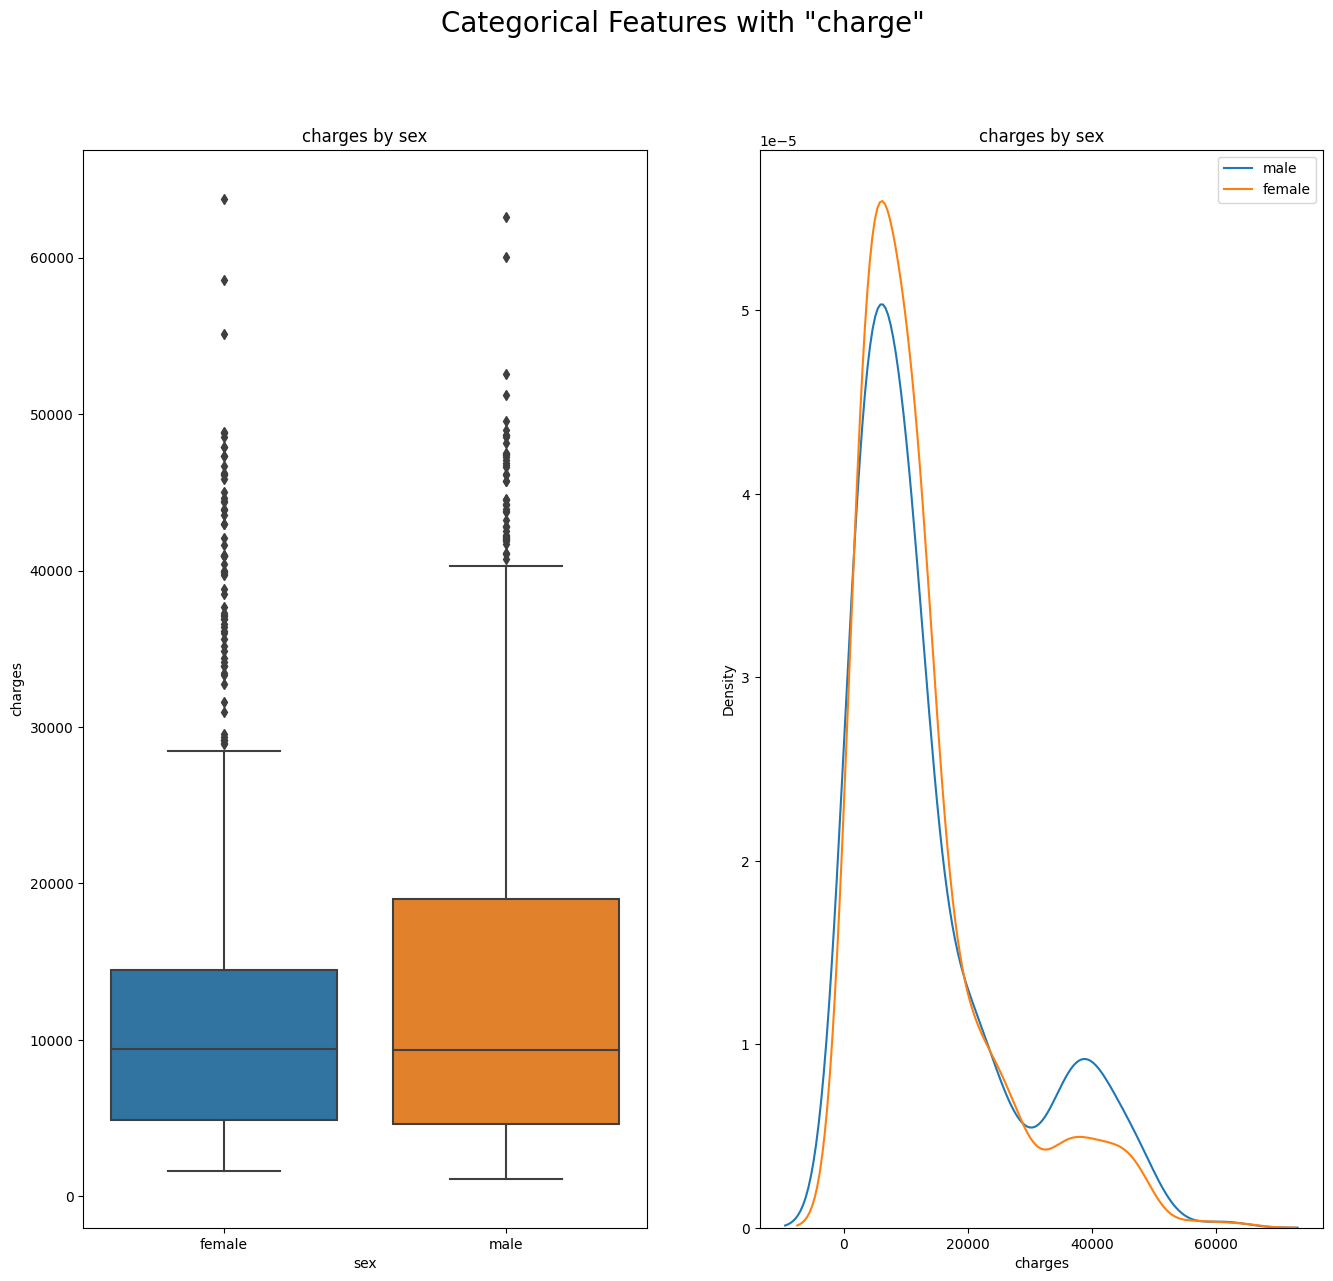

In [ ]:
fig, ((ax1, ax2)) = plt.subplots(figsize = (16,14), ncols=2, nrows=1, sharex=False, sharey=False)

# sex
sns.boxplot(x="sex", y="charges", data=data, ax=ax1)
sns.distplot(data[data['sex'] == 'male']['charges'], ax=ax2, hist=False, label="male")
sns.distplot(data[data['sex'] == 'female']['charges'], ax=ax2, hist=False, label="female")

# Config Titles
fig.suptitle('Categorical Features with "charge"', fontsize=20)
ax1.set_title('charges by sex')
ax2.set_title('charges by sex')

plt.legend()
plt.show()

### smoker  vs all numerical variable





In [ ]:
list_col = data.select_dtypes([np.number]).columns

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("smoker v/s age", "smoker v/s BMI", "smoker v/s Children", "smoker v/s Charges")
    )

for i in range(len(list_col)):
    row = i//2
    col = i%2
    fig.add_trace(go.Violin(y=data[list_col[i]],x=data['smoker'], box_visible=True),
                  row=row+1, col=col+1)

fig.show()

smoker v/s Charges 에서 보면, 흡연이 매우 중요하다는 사실을 알 수 있다.

흡연자는 비흡연자보다 더 많은 보험비를 지불하며, 비흡연자는 이상치가 존재한다.

비흡연자의 BMI에는 이상치가 많다.

#### cleaning data

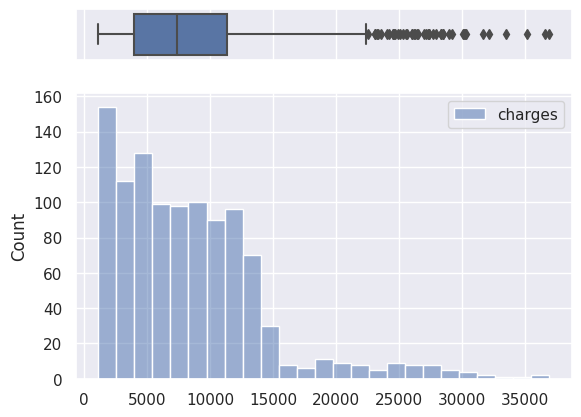

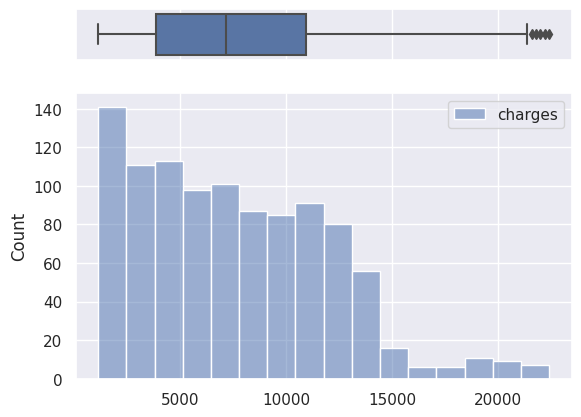

In [ ]:
data_no_charges = pd.DataFrame(data[(data.smoker == 'no')]["charges"])

Q3 = data_no_charges.quantile(0.75)
Q1 = data_no_charges.quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)

remove_outliers = data_no_charges[(data_no_charges.charges > float(lower)) & (data_no_charges.charges < float(upper))]

# all period
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x='charges', data=data_no_charges, ax=ax_box)
sns.histplot(data_no_charges, color='b', ax=ax_hist, label='not smoke')
ax_box.set(xlabel='')
plt.show()

# remove outliers
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x='charges', data=remove_outliers, ax=ax_box)
sns.histplot(remove_outliers,color='b',ax=ax_hist, label='not smoke')
ax_box.set(xlabel='')
plt.show()

### region  vs all numerical variable

In [ ]:
list_col = data.select_dtypes([np.number]).columns

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("region v/s age", "region v/s BMI", "region v/s Children", "region v/s Charges")
    )

for i in range(len(list_col)):
    row = i//2
    col = i%2
    fig.add_trace(go.Violin(y=data[list_col[i]], x=data['region'], box_visible=True),
                  row=row+1, col=col+1)

fig.show()

지역 별로 아이들의 나이와 숫자는 큰 차이가 없다.

다른 지역과 비교하여 동남쪽에서 평균 BMI가 더 높게 나타난다.

동남쪽에서 보험비 역시 다른 지역에 비해 높고, 이상치도 많이 존재한다.

### charge **vs** variable

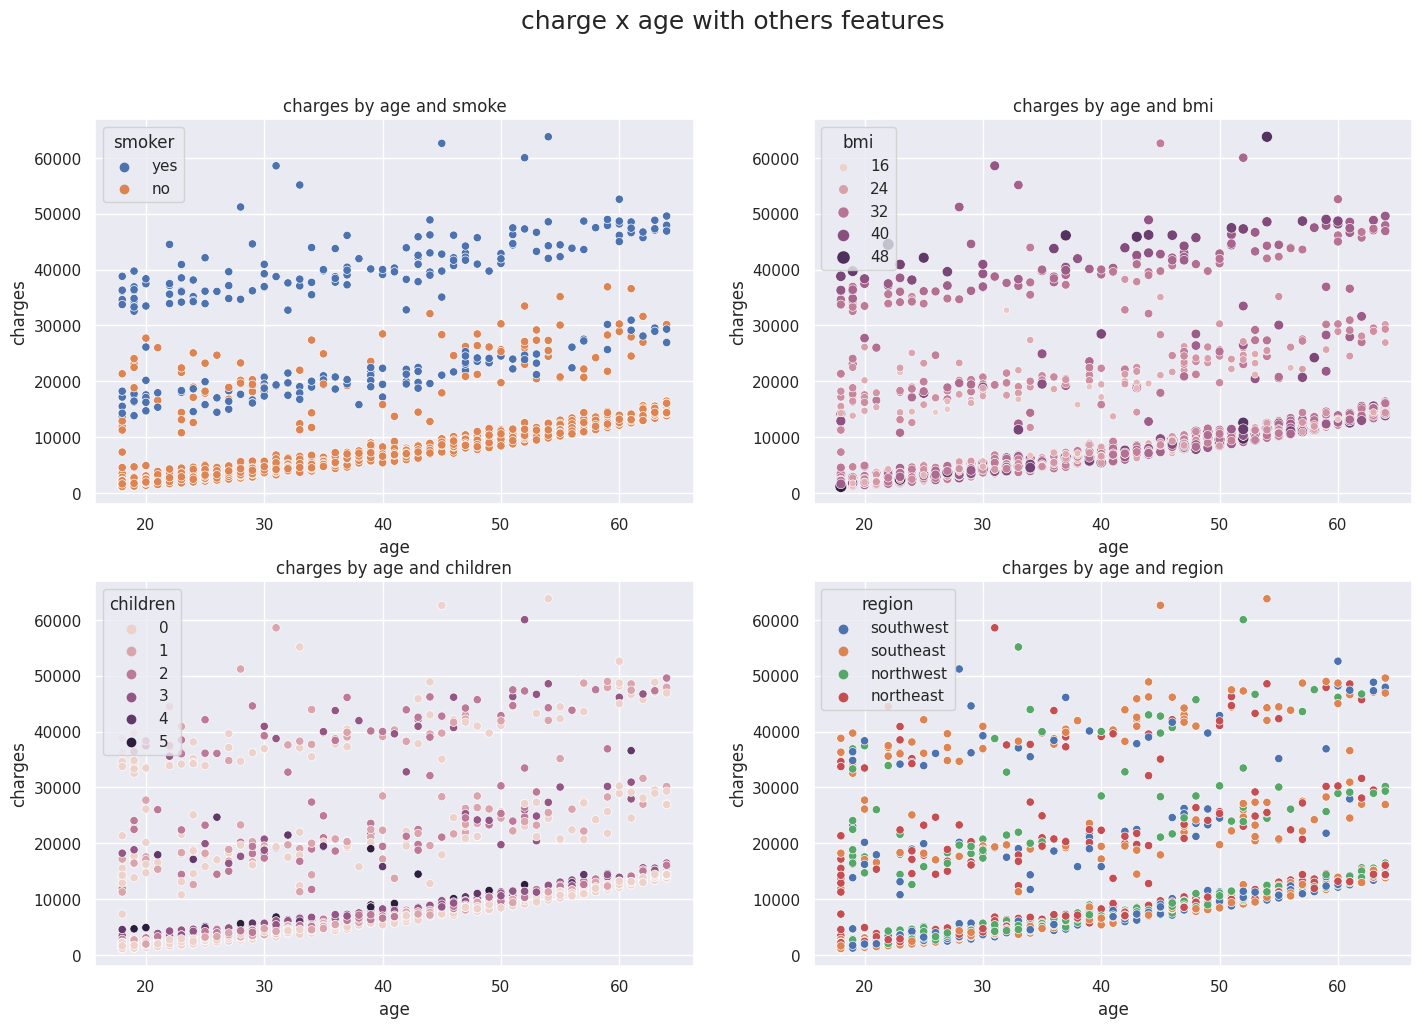

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize = (17,11), ncols=2, nrows=2, sharex=False, sharey=False)

sns.scatterplot(x="age", y="charges", hue="smoker", data=data, ax=ax1)
sns.scatterplot(x="age", y="charges", hue="bmi", data=data, size="bmi", ax=ax2)
sns.scatterplot(x="age", y="charges", hue="children", data=data, ax=ax3)
sns.scatterplot(x="age", y="charges", hue="region", data=data, ax=ax4)

# Config titles
fig.suptitle('charge x age with others features', fontsize=18)
ax1.set_title("charges by age and smoke")
ax2.set_title("charges by age and bmi")
ax3.set_title("charges by age and children")
ax4.set_title("charges by age and region")
plt.show()


연령이 높을수록 가격이 높고, 흡연자가 비흡연자에 비해 보험비가 전반적으로 더 높게 나타난다.

### BMI **vs** variable

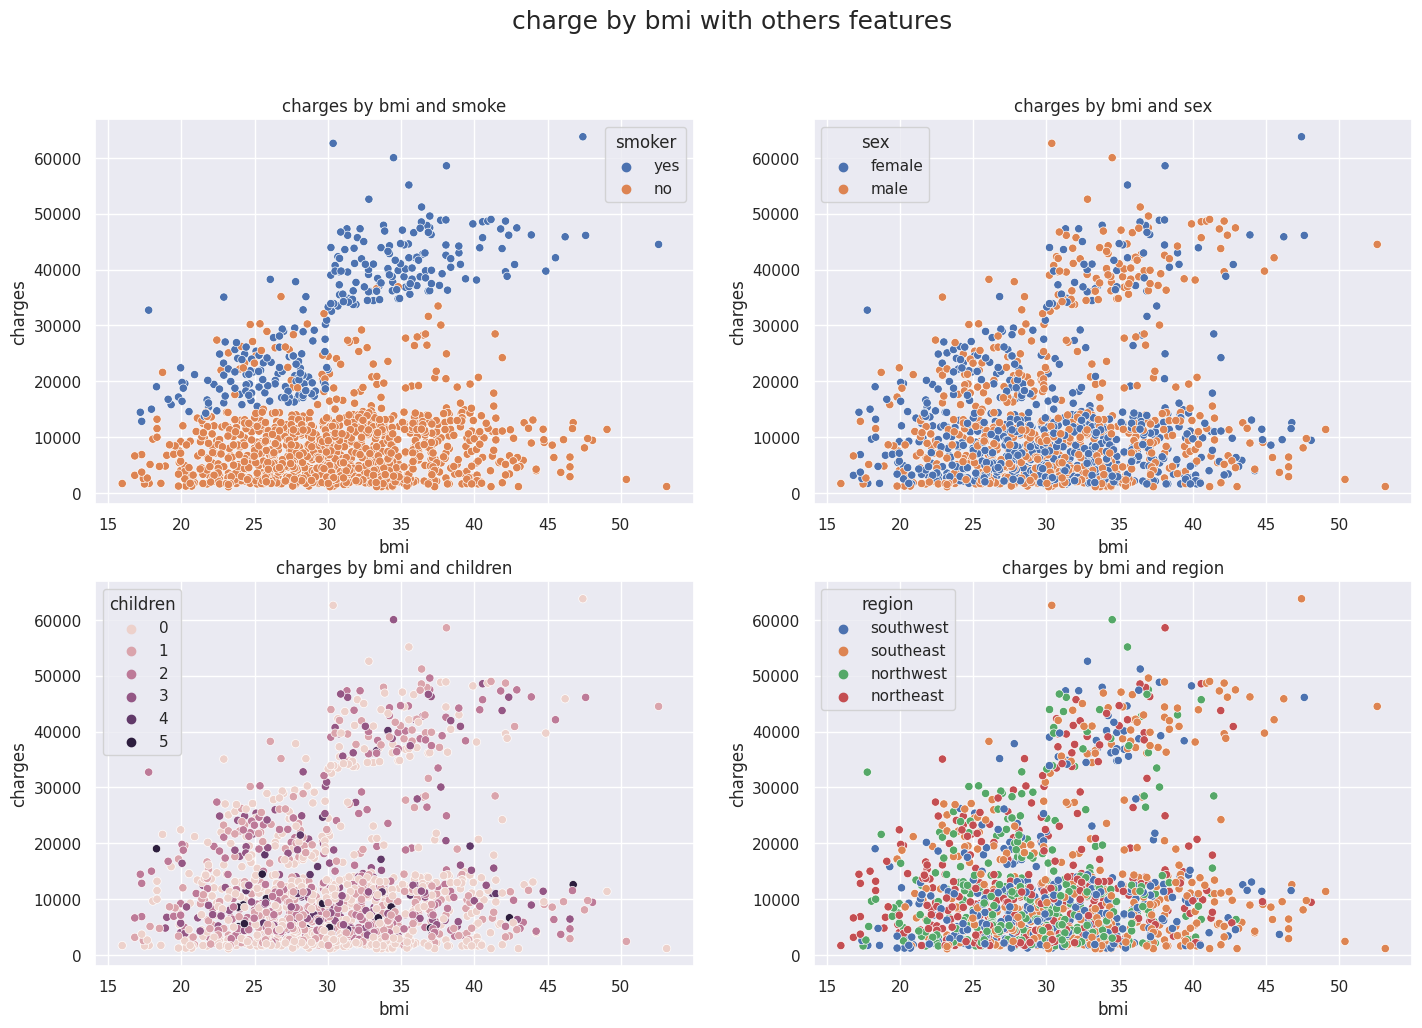

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize = (17,11), ncols=2, nrows=2, sharex=False, sharey=False)

sns.scatterplot(x="bmi", y="charges", hue="smoker", data=data, ax=ax1)
sns.scatterplot(x="bmi", y="charges", hue="sex", data=data, ax=ax2)
sns.scatterplot(x="bmi", y="charges", hue="children", data=data, ax=ax3)
sns.scatterplot(x="bmi", y="charges", hue="region", data=data, ax=ax4)

# Config Titles
fig.suptitle('charge by bmi with others features', fontsize=18)
ax1.set_title("charges by bmi and smoke")
ax2.set_title("charges by bmi and sex")
ax3.set_title("charges by bmi and children")
ax4.set_title("charges by bmi and region")

plt.show()

BMI에 따른 보험비의 증가는 크게 눈에 띄지 않지만, 기본적으로 높은 보험비의 흡연자가 일정 수준 이상의 BMI를 가지고 있게 되면, 보험비는 한단계 더 높아지게 된다.

## preprocessing

위에서
1. 만약 당신이 담배를 피운다면 당신은 비흡연자(인구의 상당 부분)보다 더 많은 비용이 들게 된다.

2. 나이가 많을수록 비용이 증가한다.
여기서 bmi는 큰 영향을 미치지 않는다. 그럼에도 불구하고, 정상 체중 이상의 일부 사람들은 주로 비만인 흡연자만큼 비싸질 수 있다.

3. 성별, 아이들 그리고 지역은 영향력이 거의 없다.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# label encoding
lebel_encoding = LabelEncoder()

# gender
lebel_encoding.fit(data.sex.drop_duplicates())
data.sex = lebel_encoding.transform(data.sex)

# smoke or not
lebel_encoding.fit(data.smoker.drop_duplicates())
data.smoker = lebel_encoding.transform(data.smoker)

#region
lebel_encoding.fit(data.region.drop_duplicates())
data.region = lebel_encoding.transform(data.region)


encoding_DF = pd.concat([data.sex, data.smoker, data.region], axis=1)
encoding_DF.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


일반적으로 변동성이 큰 범주형 변수는 원핫인코더 등을 사용하여 가장 잘 인코딩된다.

그러나 region의 경우에는 나열되는 특별한 순서가 없기 때문에 아무것도 바뀌지 않는다. 그래서 레이블 인코더만 사용하면 큰 의미가 없다.

우선 데이터의 각 열의 상관 관계를 보고 charge와의 연관성을 살펴보겠다.

<Axes: >

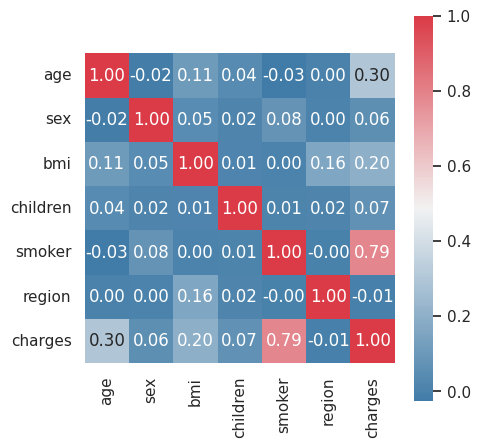

In [ ]:
f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(data.corr(), annot=True, fmt=".2f", square=True, ax=ax,
            mask=np.zeros_like(data.corr(), dtype=bool),
            cmap=sns.diverging_palette(240,10,as_cmap=True),
            )

앞서 그래프를 보고 확인했던 것처럼 age와 smoker가 charge와의 연관성이 높게 나타난다.

흡연자와 비흡연자 사이의 요금 분포를 시각화하면 환자가 치료에 가장 많이 지출하는 금액을 알 수 있도록 도와줄 수 있다.

In [ ]:
data_charges = data.iloc[:,6:7]
print(data_charges.head(3))
print("===========================================")

data_charges_smoker = data[(data['smoker'] == 1)]
print(data_charges_smoker.head(3))
print("===========================================")

data_charges_non_smoker = data[(data['smoker'] == 0)]
print(data_charges_non_smoker.head(3))

   charges
0    16884
1     1725
2     4449
    age  sex    bmi  children  smoker  region  charges
0    19    0  27.90         0       1       3    16884
11   62    0  26.29         0       1       2    27808
14   27    1  42.13         0       1       2    39611
   age  sex     bmi  children  smoker  region  charges
1   18    1  33.770         1       0       2     1725
2   28    1  33.000         3       0       2     4449
3   33    1  22.705         0       0       1    21984


In [ ]:
data.groupby('smoker').count()

,age,sex,bmi,children,region,charges
smoker,,,,,,
0,1064,1064,1064,1064,1064,1064
1,274,274,274,274,274,274


흡연자는 274명, 비흡연자는 1064명이다.

흡연자 요금과 비흡연자 요금의 히스토그램을 살펴보면 다음과 같다.


Text(0.5, 1.0, 'Distribution of charges for smokers')

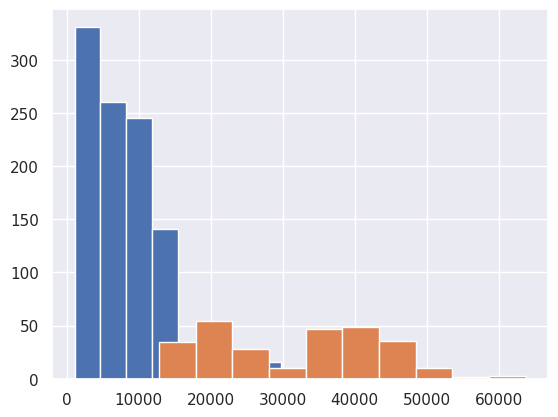

In [ ]:
plt.hist(data_charges_non_smoker['charges'])

plt.hist(data_charges_smoker['charges'])

ax.set_title('Distribution of charges for smokers')

흡연자 및 비흡연자의 평균, 중위수 요금은 다음과 같다.


In [ ]:
print("data_charges_non_smoker:")
print(data_charges_non_smoker['charges'].describe())
print("===========================================")
print("data_charges_smoker:")
print(data_charges_smoker['charges'].describe())

data_charges_non_smoker:
count     1064.000000
mean      8433.778195
std       5993.777948
min       1121.000000
25%       3985.500000
50%       7345.000000
75%      11362.250000
max      36910.000000
Name: charges, dtype: float64
data_charges_smoker:
count      274.000000
mean     32049.726277
std      11541.588040
min      12829.000000
25%      20825.750000
50%      34455.500000
75%      41019.000000
max      63770.000000
Name: charges, dtype: float64


흡연 환자는 치료에 더 많은 지출을 하는데, 이는 비흡연 환자의 평균 4배에 해당한다.

남성 흡연자와 여성 흡연자의 차이는 다음과 같다.

In [ ]:
data_charges_smoker.groupby('sex').count()

,age,bmi,children,smoker,region,charges
sex,,,,,,
0,115,115,115,115,115,115
1,159,159,159,159,159,159


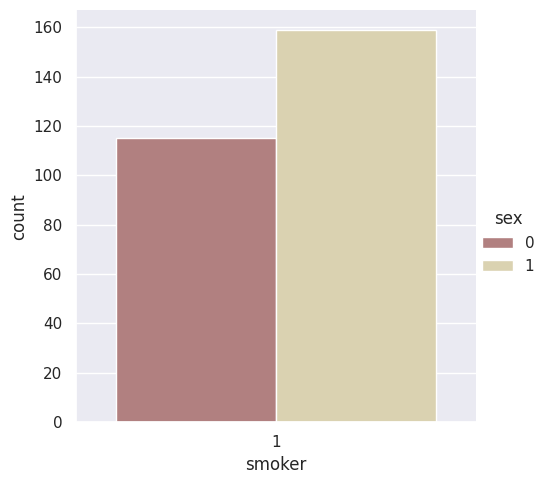

In [ ]:
sns.catplot(x="smoker", hue = 'sex',
            kind="count", palette="pink", data=data_charges_smoker)

In [ ]:
data_charges_smoker_men = data_charges_smoker[(data_charges_smoker['sex'] == 1)]
data_charges_smoker_women = data_charges_smoker[(data_charges_smoker['sex'] == 0)]

print(data_charges_smoker_men.describe())
print("===========================================")

print(data_charges_smoker_women.describe())

              age    sex         bmi    children  smoker      region  \
count  159.000000  159.0  159.000000  159.000000   159.0  159.000000   
mean    38.446541    1.0   31.504182    1.188679     1.0    1.572327   
std     13.751247    0.0    5.952028    1.170144     0.0    1.093474   
min     18.000000    1.0   17.290000    0.000000     1.0    0.000000   
25%     27.000000    1.0   27.360000    0.000000     1.0    1.000000   
50%     38.000000    1.0   31.130000    1.000000     1.0    2.000000   
75%     49.500000    1.0   35.565000    2.000000     1.0    2.000000   
max     64.000000    1.0   52.580000    4.000000     1.0    3.000000   

            charges  
count    159.000000  
mean   33041.515723  
std    11202.703390  
min    12829.000000  
25%    21241.000000  
50%    36085.000000  
75%    41797.500000  
max    62592.000000  
              age    sex         bmi    children  smoker      region  \
count  115.000000  115.0  115.000000  115.000000   115.0  115.000000   
mean    3

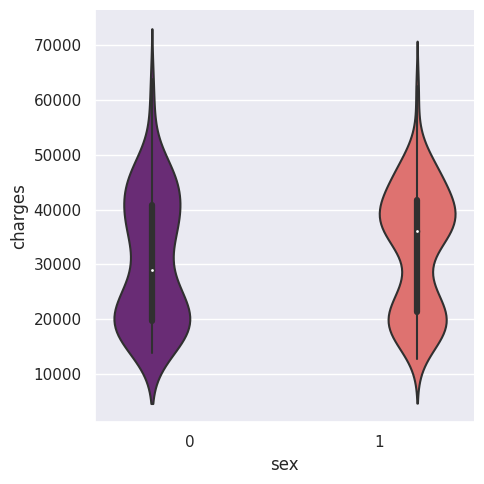

In [ ]:
sns.catplot(x="sex", y="charges", hue="sex",
            kind="violin", palette='magma', data=data_charges_smoker)

여성 흡연자가 남성 흡연자보다 7% 더 치료비로 소비한다.

연령에 대한 치료비는 다음과 같다.

In [ ]:
data_charges_smoker.groupby('age').count().head(3)

,sex,bmi,children,smoker,region,charges
age,,,,,,
18,12,12,12,12,12,12
19,18,18,18,18,18,18
20,9,9,9,9,9,9


(array([47., 30., 23., 27., 22., 33., 28., 22., 15., 27.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

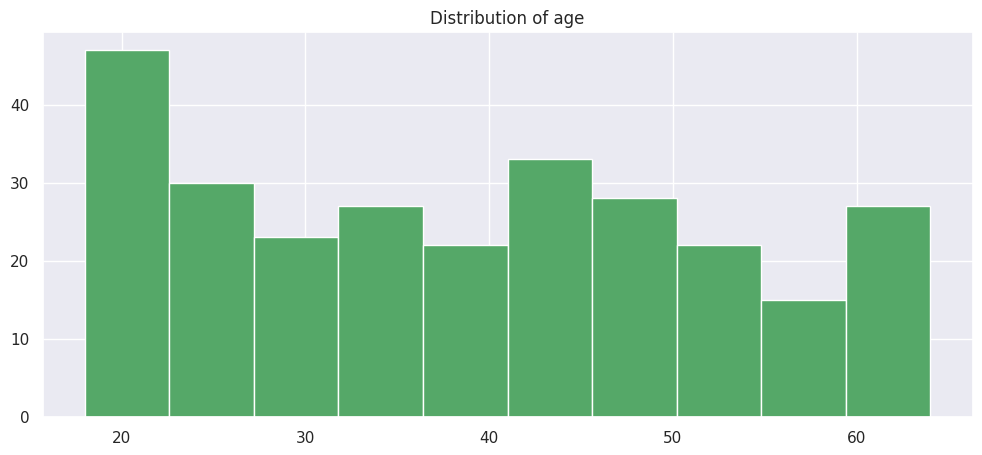

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
plt.hist(data_charges_smoker['age'], color = 'g')

In [ ]:
print(data_charges_smoker['age'].mode())
print("=====================================")

dx = data_charges_smoker.groupby('age').charges.agg(['sum','mean'])
print(dx.head(5))

0    19
Name: age, dtype: int64
        sum          mean
age                      
18   305678  25473.166667
19   486011  27000.611111
20   221164  24573.777778
21    33301  16650.500000
22   224237  37372.833333


흡연자의 수가 많은 연령은 19세이다.

18-19세 흡연자의 성별은 다음과 같다.

<ipython-input-27-7d1835b94e70>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'The number of male and female smokers (18-19 years old)')

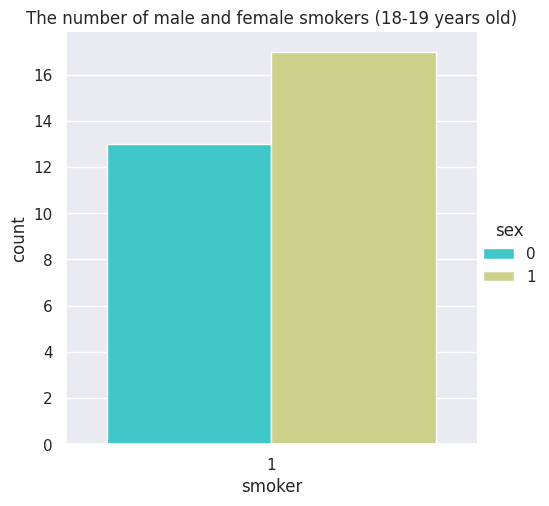

In [ ]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow",
            data=data_charges_smoker[(data.age < 20)])

plt.title("The number of male and female smokers (18-19 years old)")

### 결론

탐색적 데이터 분석을 사용하여 데이터셋을 조사하고 각 변수와 변수의 관계를 이해해보았다.

EDA의 주요 목적은 가정을 하기 전에 데이터를 이해할 수 있게 도와주며, 분포, 요약 통계량, 변수와 이상치 사이의 관계를 볼 수 있다.

이 데이터셋에서 의료 비용을 결정하는 가장 중요한 요인은 담배를 피우고 있는지의 여부로 볼 수 있다.

두 번째로 중요한 특징인 많은 나이는 분명히 훨씬 더 많은 의료 서비스가 필요하기 때문에 합리적인 분석결과이다.

반면, 지역에 따른 차이는 거의 없다.

### Prediction using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [ ]:
train, test = train_test_split(data,test_size=.2,random_state=42)

target = train.charges
x_train = train.drop(['charges'],axis=1)

model = LinearRegression()
model.fit(x_train, target)

y_test = test.charges
x_test = test.drop(['charges'],axis=1)

print(model.score(x_test,y_test)) # R2 Score

y_predict = model.predict(x_test)

0.7833469128363175


train 데이터셋을 이용해서 test 데이터의 의료비를 선형 회귀법으로 추정한 결과이다.

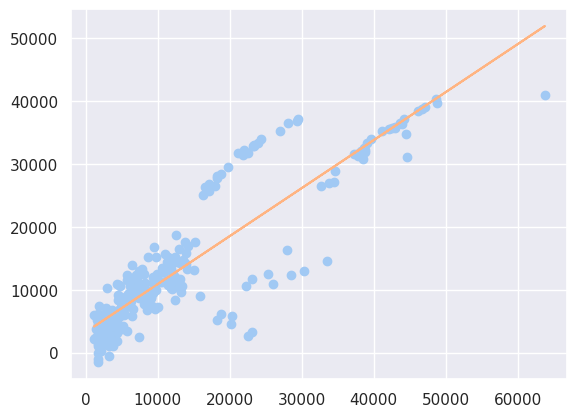

In [ ]:
palette = sns.color_palette("pastel")
sns.set_palette(palette)
plt.plot(y_test,y_predict,'o')

m, b = np.polyfit(y_test,y_predict,1)
plt.plot(y_test,m*y_test+b)
plt.show()

In [ ]:
print("Mean Absolute Error: ", mae(y_test,y_predict))
print("R2 Score: ", r2_score(y_test,y_predict))

Mean Absolute Error:  4186.517167309188
R2 Score:  0.7833469128363175
